In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import GridSearchCV, learning_curve, ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [2]:
df = pd.read_csv('data/breast-cancer-diagnostic.shuf.lrn.csv')
df.rename(columns=lambda x: x.lstrip(' '), inplace=True) 
df.set_index('ID', inplace=True)
df

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
8611161,False,13.34,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,...,15.53,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160
8912280,True,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.090520,0.1876,...,18.55,25.09,126.90,1031.0,0.1365,0.47060,0.50260,0.17320,0.2770,0.10630
901303,False,16.17,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.25500,0.21140,0.12510,0.3153,0.08960
86973701,False,14.95,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.035620,0.1744,...,16.25,25.47,107.10,809.7,0.0997,0.25210,0.25000,0.08405,0.2852,0.09218
8511133,True,15.34,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.2521,...,18.07,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612399,True,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,...,22.93,27.68,152.20,1603.0,0.1398,0.20890,0.31570,0.16420,0.3695,0.08579
88147202,False,12.62,23.97,81.35,496.4,0.07903,0.07529,0.054380,0.020360,0.1514,...,14.20,31.31,90.67,624.0,0.1227,0.34540,0.39110,0.11800,0.2826,0.09585
897374,False,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,...,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207


In [3]:
X = df.iloc[:, 1:].reset_index()
y = df.reset_index()['class'].to_numpy()
X.drop(['ID'], inplace=True , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101, stratify=y)

In [4]:
X_train.shape

(199, 30)

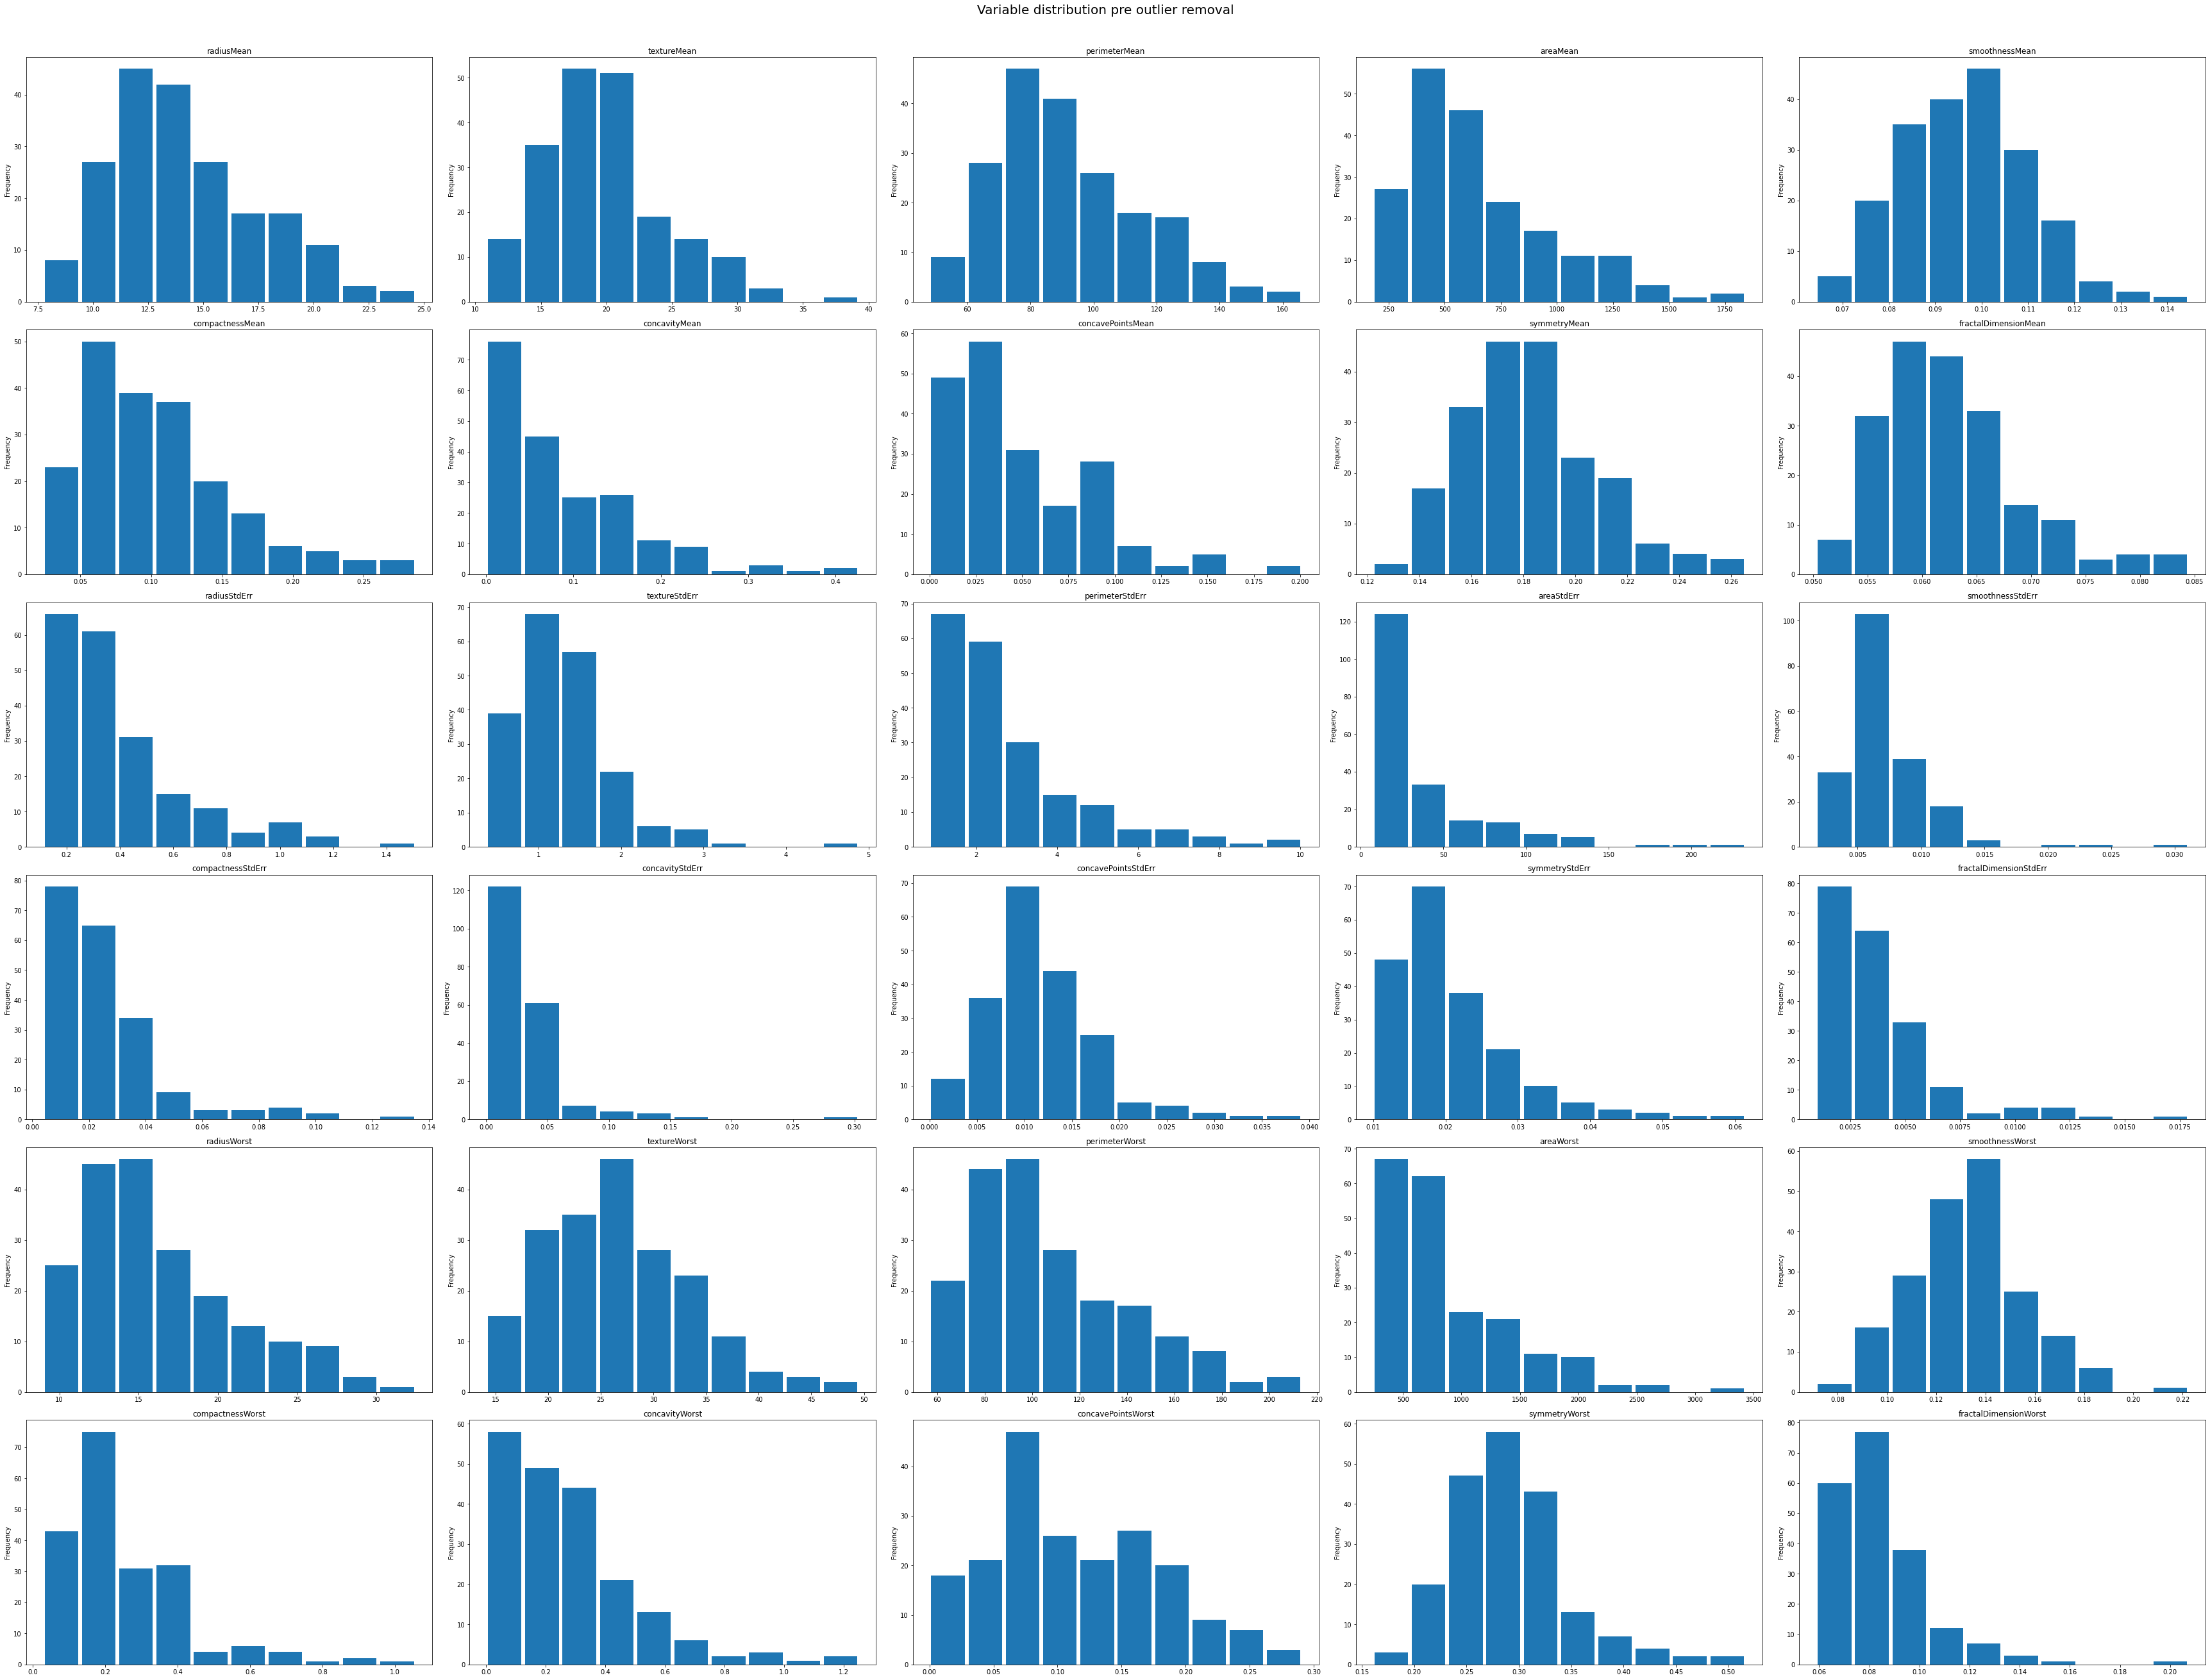

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=6 , figsize= (48,36))
fig.suptitle('Variable distribution pre outlier removal', y=1.01, fontsize=20)
for col, ax in zip(X_train.iloc[: , 0:30], axs.ravel()):
    X_train[col].plot(kind='hist', ax=ax, title=col, rwidth=0.9)

plt.tight_layout()
plt.savefig('Variable distribution pre outlier removal.jpg', dpi=300, bbox_inches='tight')

In [6]:
X_train['class'] = y_train
columns = list(X_train.loc[:, X_train.columns != 'class'].columns)
IF = IsolationForest(random_state=42)
IF.fit(X_train[columns])
X_train['anomaly'] = IF.predict(X_train[columns])
len(X_train[X_train['anomaly'] == -1])

23

In [7]:
X_train = X_train[X_train.anomaly != -1]
X_train.drop('anomaly', axis=1, inplace=True)
y_train = X_train['class']
X_train = X_train.drop('class', axis=1)
print(X_train.shape)
print(len(y_train))

(176, 30)
176


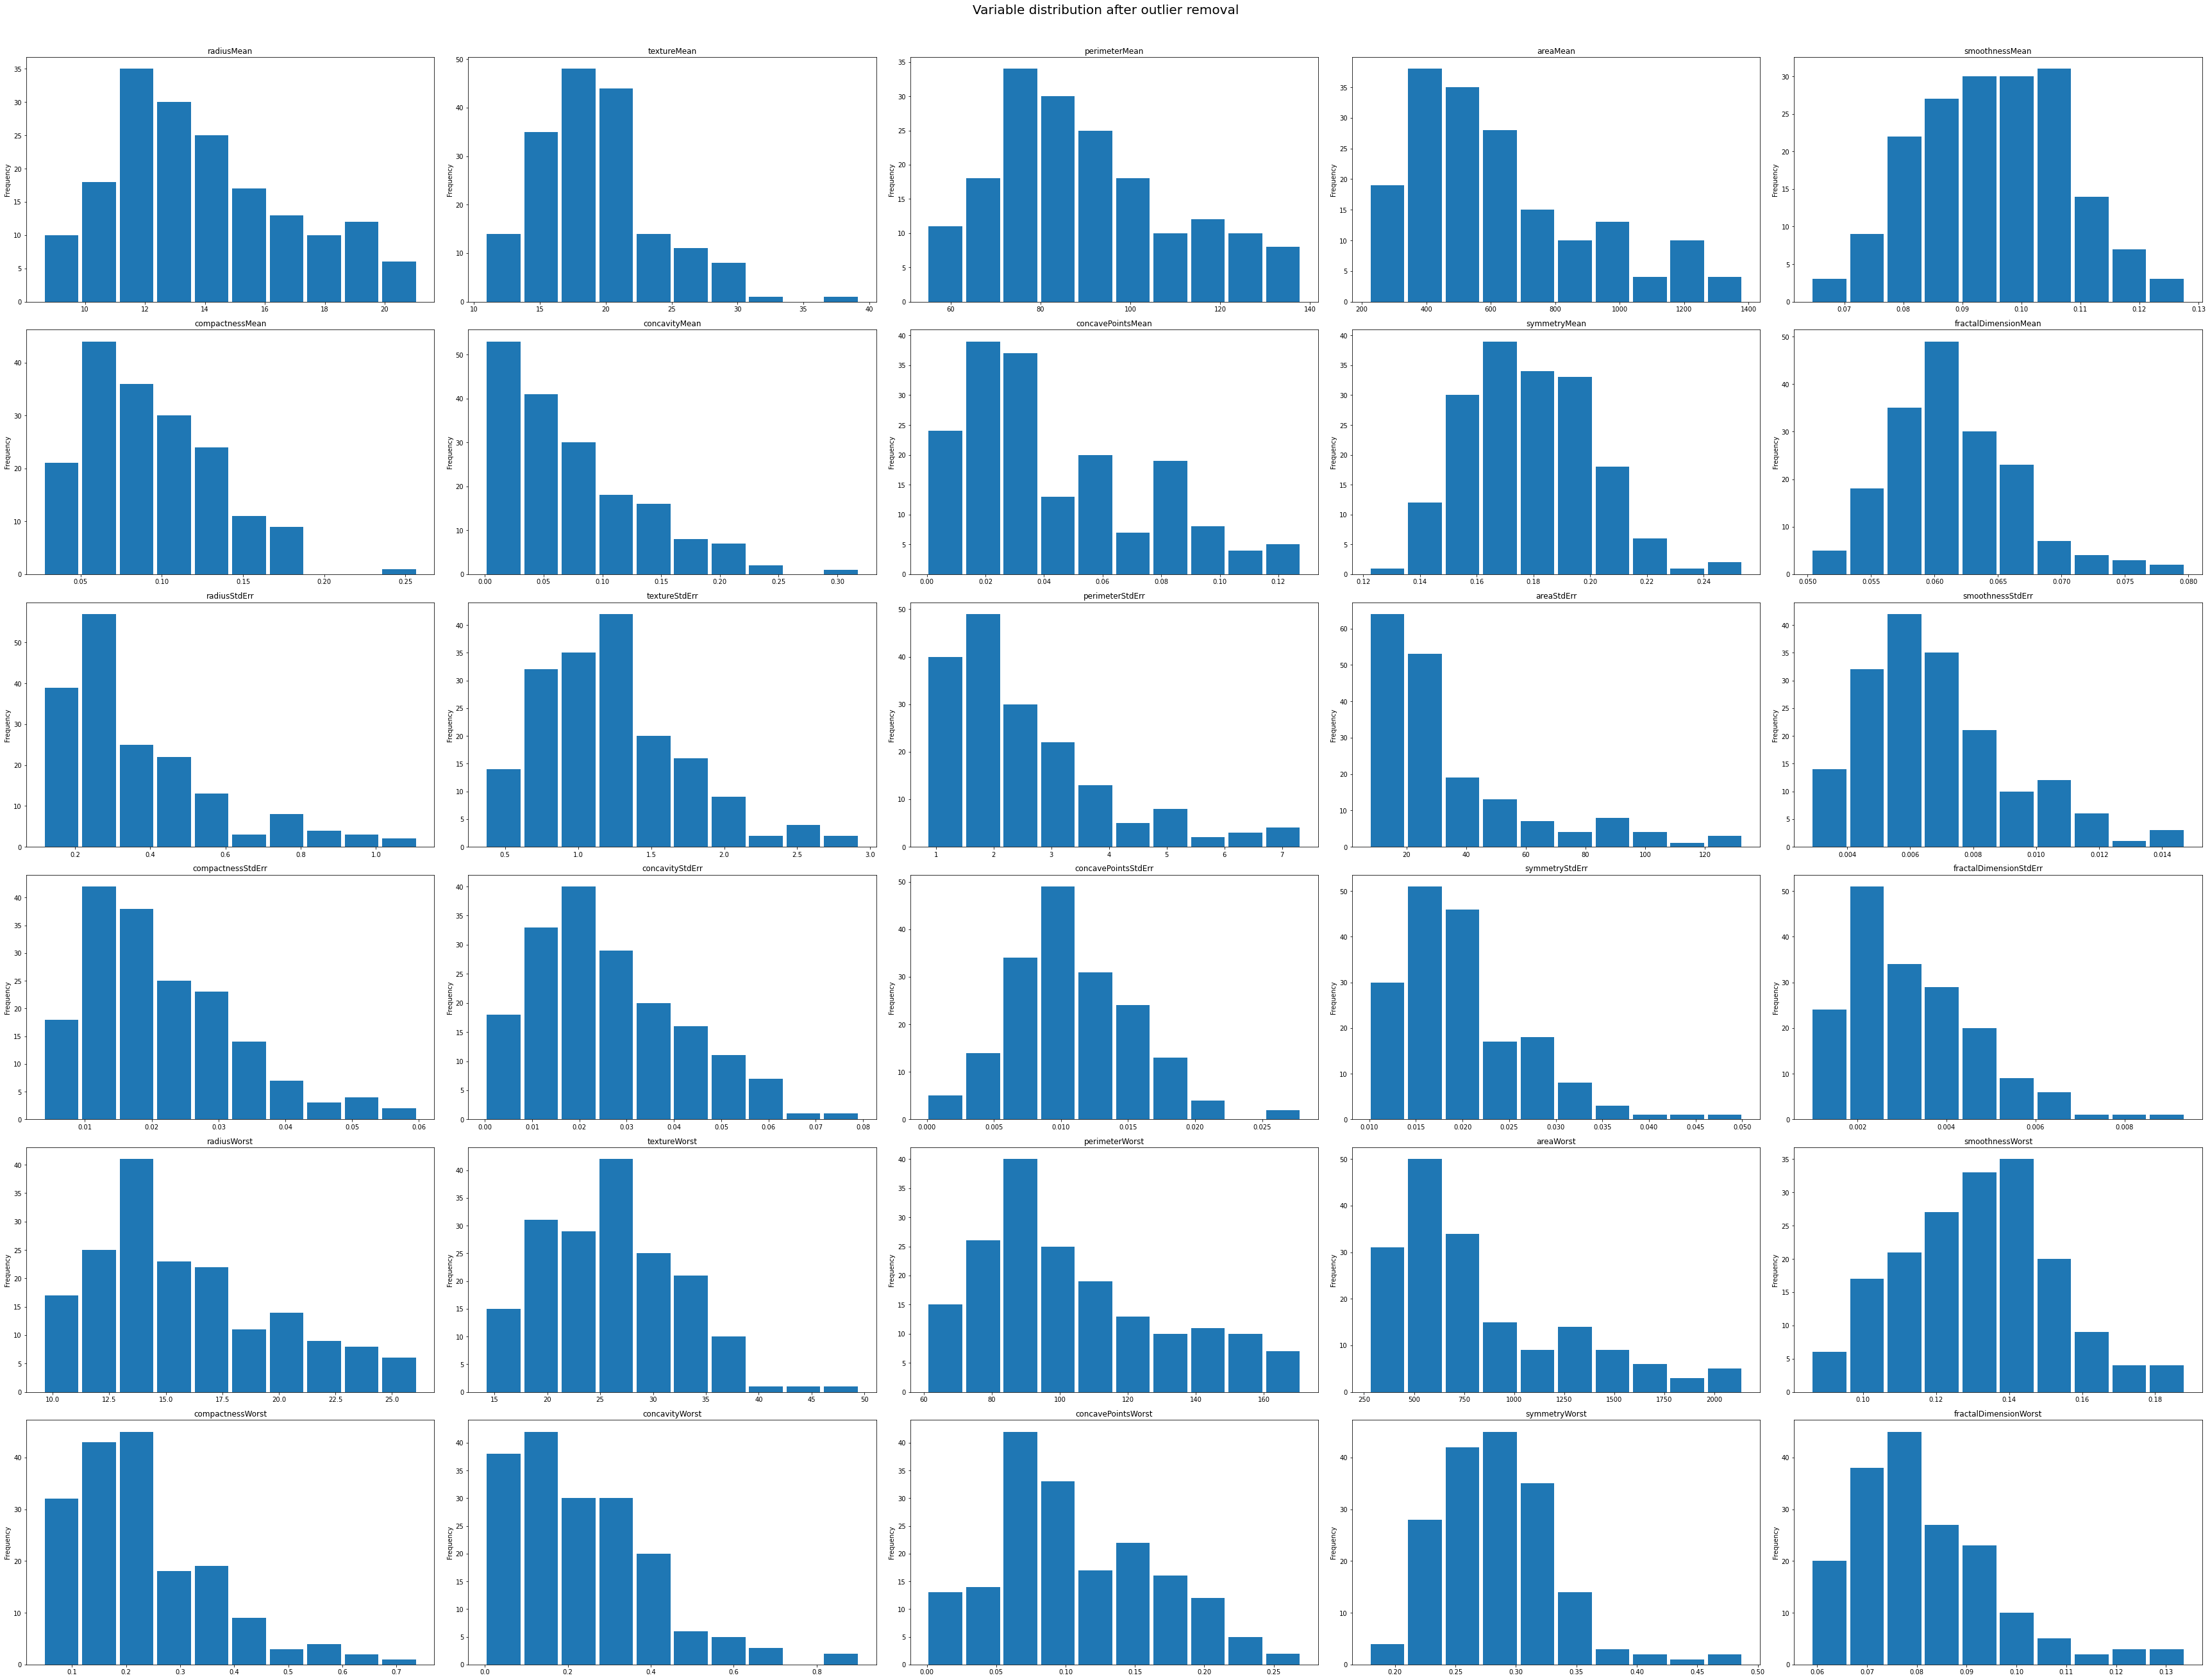

In [8]:
fig, axs = plt.subplots(ncols=5, nrows=6 , figsize= (48,36))
fig.suptitle('Variable distribution after outlier removal', y=1.01, fontsize=20)
for col, ax in zip(X_train.iloc[: , 0:30], axs.ravel()):
    X_train[col].plot(kind='hist', ax=ax, title=col, rwidth=0.9)

plt.tight_layout()
plt.savefig('Variable distribution after outlier removal.jpg', dpi=300, bbox_inches='tight')

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
scaled_features = mapper.fit_transform(X_train.copy())
scaled_features_1 = mapper.transform(X_test.copy())
scaled_features_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
scaled_features_test = pd.DataFrame(scaled_features_1, index=X_test.index, columns=X_train.columns)

In [10]:
scaled_features_train

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
29,-0.066573,-0.323755,-0.109622,-0.151699,-1.265914,-0.741026,-0.738028,-0.956818,-1.402391,-1.098070,...,-0.147103,-0.552022,-0.258083,-0.229639,-1.636898,-0.358249,-0.461620,-0.783993,-1.041445,-0.755245
172,0.060129,-1.418661,-0.014018,-0.035770,-0.170724,-1.007854,-0.923218,-0.505649,-1.847041,-0.863224,...,-0.100021,-1.255741,-0.213918,-0.174338,-0.161858,-0.908523,-1.074416,-0.805898,-1.563146,-0.708243
40,-0.679534,-0.965897,-0.654712,-0.734287,1.651382,0.676402,-1.021786,-0.809642,2.981859,0.860933,...,-0.774044,-1.299920,-0.772726,-0.758908,-0.104741,-0.311303,-1.203997,-0.996755,0.573740,-0.362884
269,-0.028905,-0.918008,-0.066074,-0.142866,-0.004641,-0.413851,-0.472855,-0.191374,1.430030,-0.563796,...,-0.236312,-0.665627,-0.215013,-0.358442,-0.618792,-0.435211,-0.525669,-0.109201,0.221071,-0.824725
222,-0.152182,0.631839,-0.170187,-0.240025,-0.617626,-0.411357,-0.427719,-0.296454,0.091633,-0.827997,...,-0.194186,0.924841,-0.192019,-0.292082,-0.728266,-0.445216,-0.035813,0.370829,0.045779,-0.821319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.912796,1.890002,0.900472,0.853386,-0.855920,0.220052,0.319014,0.319886,-0.882150,-0.964990,...,0.754899,1.287746,0.819018,0.687654,-0.837739,0.619161,0.628993,0.601759,-1.316903,-0.206212
205,2.121597,1.927007,2.046714,2.336172,0.207176,0.247483,1.173443,1.762404,-0.161817,-1.190051,...,1.922049,1.939396,1.851954,2.086288,-0.709227,-0.282827,0.517500,0.958343,-0.578175,-1.012050
18,-0.508316,-0.804817,-0.387422,-0.548801,2.614186,1.908298,1.402441,1.215475,1.327760,2.880605,...,-0.114889,-0.348480,-0.031421,-0.193463,2.265604,2.277679,1.786621,1.150219,2.370478,2.940847
33,-0.700080,0.385866,-0.696757,-0.708157,0.201560,-0.306122,-0.792124,-0.683674,1.025398,0.291433,...,-0.714571,0.197455,-0.699727,-0.697386,0.528303,-0.078879,-0.698839,-0.402958,0.471487,-0.525687


In [11]:
scaled_features_train['class'] = y_train
Xy_train = pd.DataFrame.copy(scaled_features_train, deep=True)
scaled_features_train.drop('class', axis=1, inplace=True)

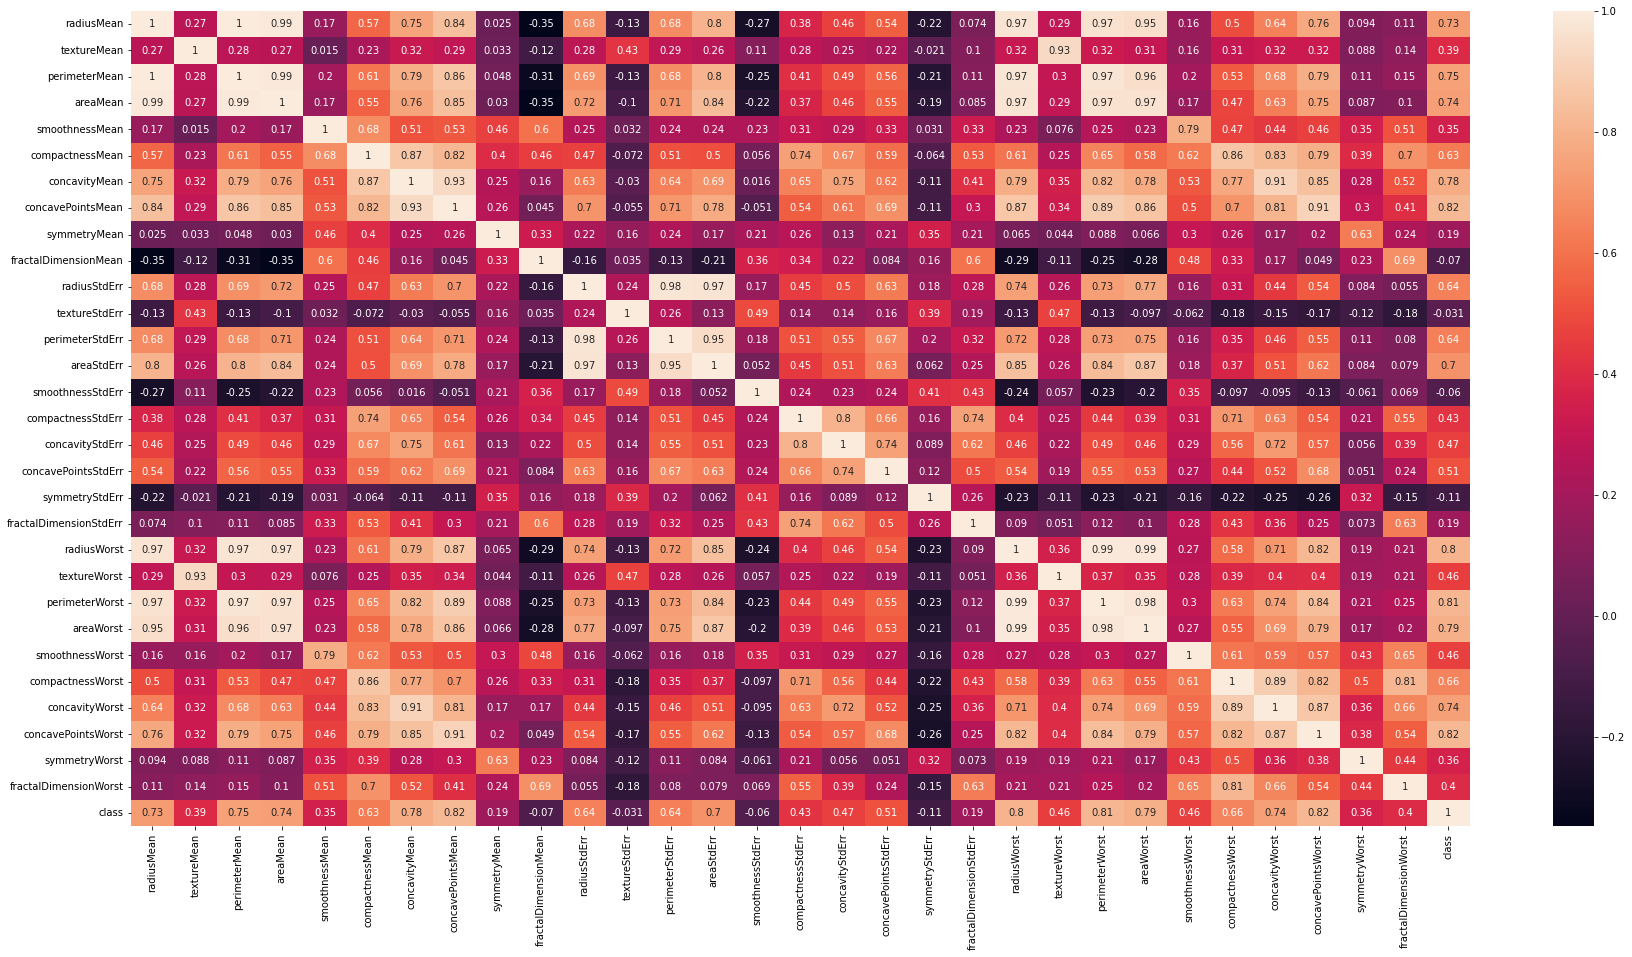

In [12]:
fig, ax = plt.subplots(figsize=(30,15)) 
sns.heatmap(Xy_train.corr(), annot=True)
plt.savefig('heatmap.jpg', dpi=300, bbox_inches='tight')

In [13]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

corr_support, cor_feature = cor_selector(scaled_features_train, y_train, 10)
print("Selected Features")
print(cor_feature)

Selected Features
['radiusMean', 'areaMean', 'concavityWorst', 'perimeterMean', 'concavityMean', 'areaWorst', 'radiusWorst', 'perimeterWorst', 'concavePointsWorst', 'concavePointsMean']


In [14]:
X_train_corr = scaled_features_train[cor_feature]
X_test_corr = scaled_features_test[cor_feature]
X_train_corr

,radiusMean,areaMean,concavityWorst,perimeterMean,concavityMean,areaWorst,radiusWorst,perimeterWorst,concavePointsWorst,concavePointsMean
29,-0.066573,-0.151699,-0.461620,-0.109622,-0.738028,-0.229639,-0.147103,-0.258083,-0.783993,-0.956818
172,0.060129,-0.035770,-1.074416,-0.014018,-0.923218,-0.174338,-0.100021,-0.213918,-0.805898,-0.505649
40,-0.679534,-0.734287,-1.203997,-0.654712,-1.021786,-0.758908,-0.774044,-0.772726,-0.996755,-0.809642
269,-0.028905,-0.142866,-0.525669,-0.066074,-0.472855,-0.358442,-0.236312,-0.215013,-0.109201,-0.191374
222,-0.152182,-0.240025,-0.035813,-0.170187,-0.427719,-0.292082,-0.194186,-0.192019,0.370829,-0.296454
...,...,...,...,...,...,...,...,...,...,...
156,0.912796,0.853386,0.628993,0.900472,0.319014,0.687654,0.754899,0.819018,0.601759,0.319886
205,2.121597,2.336172,0.517500,2.046714,1.173443,2.086288,1.922049,1.851954,0.958343,1.762404
18,-0.508316,-0.548801,1.786621,-0.387422,1.402441,-0.193463,-0.114889,-0.031421,1.150219,1.215475
33,-0.700080,-0.708157,-0.698839,-0.696757,-0.792124,-0.697386,-0.714571,-0.699727,-0.402958,-0.683674


In [15]:
svc_model = SVC()
svc_model.fit(X_train_corr, y_train)
svc_predict = svc_model.predict(X_test_corr)

rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

rf_clf.fit(X_train_corr, y_train)
knn_clf.fit(X_train_corr, y_train)

rf_pred = rf_clf.predict(X_test_corr)
knn_pred = knn_clf.predict(X_test_corr)

print("Pre-Tuning Performance")
print("SVM")
print("Accuracy:", accuracy_score(y_test, svc_predict))
print("F1 Score:", f1_score(y_test, svc_predict))
print("ROC AUC Score:", roc_auc_score(y_test, svc_predict))
print(" ")
print("RandomForestClassifier :")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred))
print(" ")
print("K-Nearest-Neighbors Classifier :")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))
print("ROC AUC Score:", roc_auc_score(y_test, knn_pred))

Pre-Tuning Performance
SVM
Accuracy: 0.8953488372093024
F1 Score: 0.8615384615384615
ROC AUC Score: 0.8865065751858205
 
RandomForestClassifier :
Accuracy: 0.8837209302325582
F1 Score: 0.8387096774193549
ROC AUC Score: 0.8656375071469411
 
K-Nearest-Neighbors Classifier :
Accuracy: 0.8837209302325582
F1 Score: 0.8529411764705883
ROC AUC Score: 0.8827901658090338


In [16]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 7),
):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 10))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

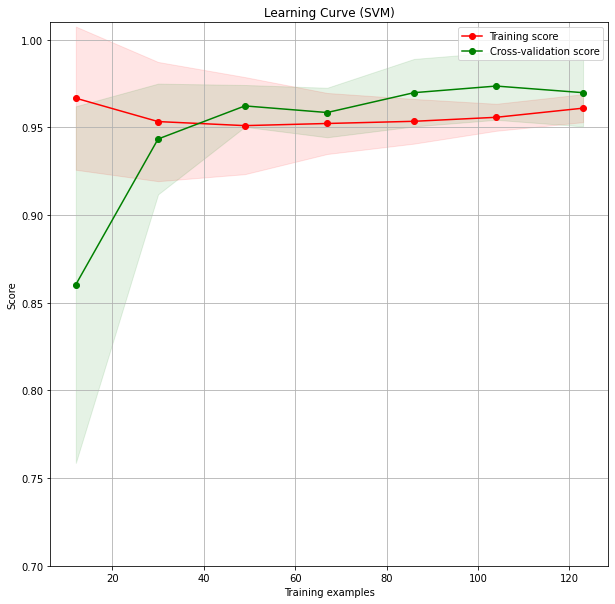

In [17]:
title = r"Learning Curve (SVM)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = SVC()
plot_learning_curve(
    estimator, title, X_train_corr, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.savefig('Learning curve (SVM).jpg', dpi=300, bbox_inches='tight')

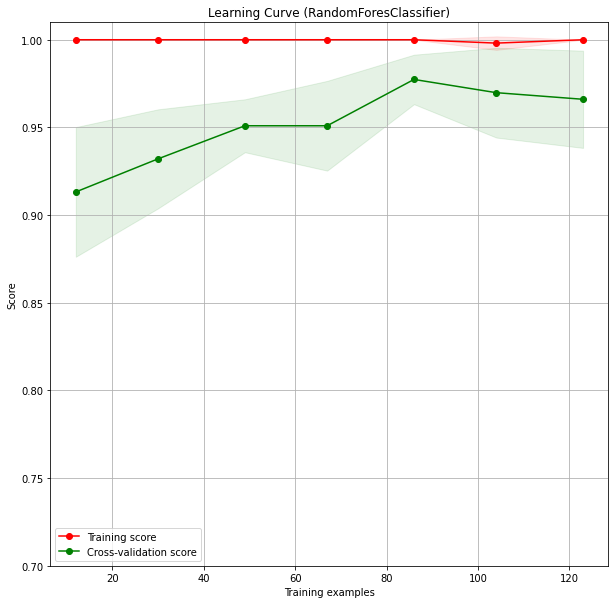

In [18]:
title = r"Learning Curve (RandomForesClassifier)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(
    estimator, title, X_train_corr, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.savefig('Learning curve (RFClass).jpg', dpi=300, bbox_inches='tight')

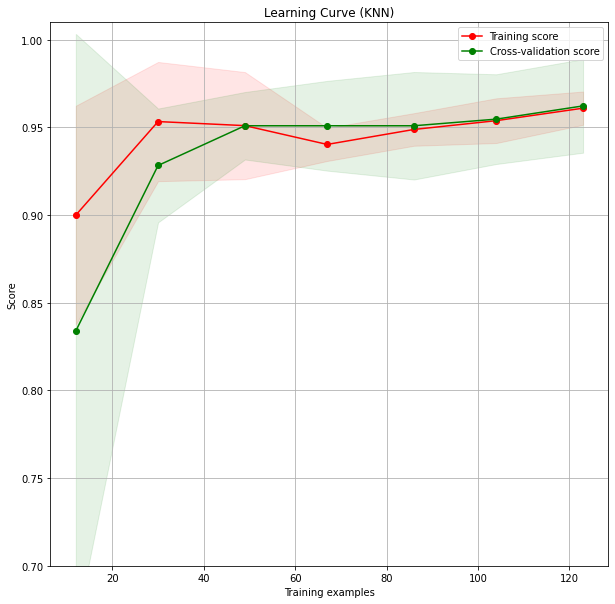

In [19]:
title = r"Learning Curve (KNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = KNeighborsClassifier()
plot_learning_curve(
    estimator, title, X_train_corr, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.savefig('Learning curve (KNN).jpg', dpi=300, bbox_inches='tight')

In [20]:
C_param = [0.03, 0.1, 4, 16, 32, 64, 128, 256]
gamma_param = [0.004, 0.02, 0.06, 0.5, 4]
param_grid_svm = { 'C': C_param,
                'kernel':['rbf','sigmoid','linear', 'poly'],
                'degree':[1,2,3,4,5,6],
                'gamma': gamma_param}
                
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, n_jobs=-1, scoring='f1')
grid_svm.fit(X_train_corr, y_train)

print(grid_svm.best_params_)
print(grid_svm.score(X_test_corr, y_test))

{'C': 16, 'degree': 1, 'gamma': 4, 'kernel': 'poly'}
0.8823529411764706


In [21]:
param_grid_rf = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, n_jobs=-1, scoring='f1')
grid_rf.fit(X_train_corr, y_train)

print(grid_rf.best_params_)
print(grid_rf.score(X_test_corr, y_test))

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.8387096774193549


In [22]:
param_grid_knn = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, n_jobs=-1, scoring='f1')

grid_knn.fit(X_train_corr, y_train)

print(grid_knn.best_params_)
print(grid_knn.score(X_test_corr, y_test))

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
0.8529411764705883


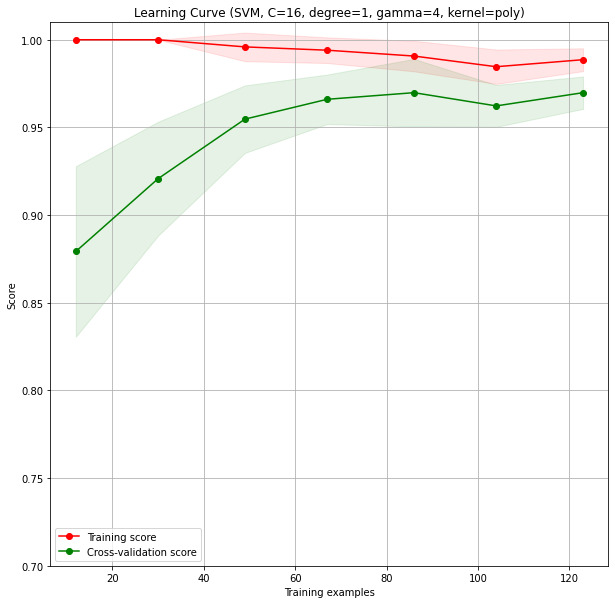

In [23]:
title = r"Learning Curve (SVM, C=16, degree=1, gamma=4, kernel=poly)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = SVC(C=16, degree=1, kernel='poly', gamma=4)
plot_learning_curve(
    estimator, title, X_train_corr, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.savefig('Learning curve (SVM tuned).jpg', dpi=300, bbox_inches='tight')

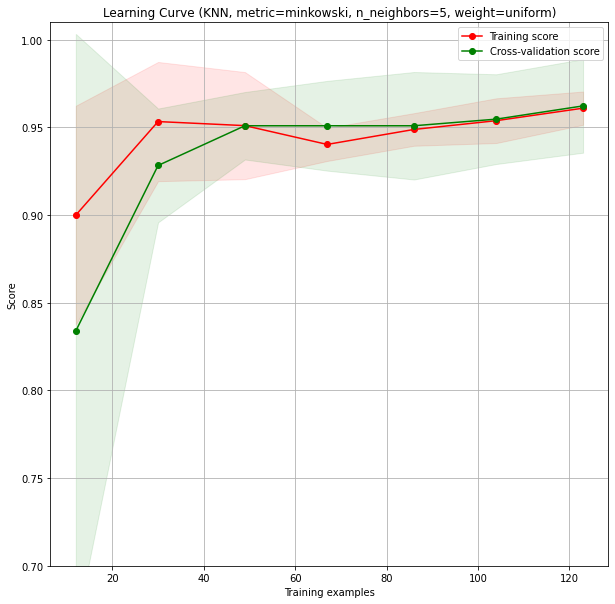

In [24]:
title = r"Learning Curve (KNN, metric=minkowski, n_neighbors=5, weight=uniform)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='uniform')
plot_learning_curve(
    estimator, title, X_train_corr, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.savefig('Learning curve (KNN tuned).jpg', dpi=300, bbox_inches='tight')

In [25]:
df_test = pd.read_csv('data/breast-cancer-diagnostic.shuf.tes.csv')
df_test.rename(columns=lambda x: x.lstrip(' '), inplace=True) 
df_test.set_index('ID', inplace=True)
df_test

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
88299702,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,...,31.010,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
911201,14.530,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.800,16.93,103.10,749.9,0.13470,0.14780,0.13730,0.10690,0.2606,0.07810
90312,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,0.05884,...,20.820,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
86135502,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,0.1953,0.05629,...,24.560,30.41,152.90,1623.0,0.12490,0.32060,0.57550,0.19560,0.3956,0.09288
88411702,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,15.010,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92751,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
915186,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520
8913,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915


In [26]:
X_kaggle_test = df_test.reset_index()
X_kaggle_test.drop('ID', inplace=True, axis=1)
X_kaggle_test

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,...,31.010,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
1,14.530,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.800,16.93,103.10,749.9,0.13470,0.14780,0.13730,0.10690,0.2606,0.07810
2,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,0.05884,...,20.820,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
3,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,0.1953,0.05629,...,24.560,30.41,152.90,1623.0,0.12490,0.32060,0.57550,0.19560,0.3956,0.09288
4,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,15.010,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
280,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520
281,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
282,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,10.510,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178


In [27]:
scaled_features_4 = mapper.transform(X_kaggle_test.copy())
scaled_features_kaggle = pd.DataFrame(scaled_features_4, index=X_kaggle_test.index, columns=X_train.columns)
scaled_features_kaggle = scaled_features_kaggle[cor_feature]
scaled_features_kaggle

,radiusMean,areaMean,concavityWorst,perimeterMean,concavityMean,areaWorst,radiusWorst,perimeterWorst,concavePointsWorst,concavePointsMean
0,3.176302,3.841407,2.062388,3.162922,2.019740,4.881253,3.735965,3.713429,2.596930,2.591153
1,0.203952,0.066174,-0.574892,0.177690,-0.071942,-0.174338,-0.033114,-0.042371,0.009151,0.703251
2,1.922984,2.015987,0.881631,1.931589,1.863756,1.123143,1.210856,1.377460,1.292852,1.897048
3,1.741492,1.655320,2.023840,1.586215,1.219906,1.837437,2.137638,1.775305,1.515293,1.273960
4,-0.063148,-0.133297,-0.583195,-0.088599,-0.436680,-0.275492,-0.228878,-0.228518,-0.769220,-0.630652
...,...,...,...,...,...,...,...,...,...,...
279,-2.114344,-1.638533,-1.389146,-2.121801,-1.216103,-1.283338,-1.605174,-1.646159,-1.806030,-1.383885
280,-1.597949,-1.389378,-0.144340,-1.442565,0.398500,-1.210526,-1.400985,-1.285179,-0.065562,0.303819
281,-0.357644,-0.406006,-0.685792,-0.421459,-0.841077,-0.572730,-0.573324,-0.615413,-0.894874,-1.007590
282,-1.495561,-1.275657,-0.964465,-1.506634,-0.941969,-1.128267,-1.343990,-1.405992,-0.579722,-0.848203


In [28]:
df_sol = pd.read_csv('data/breast-cancer-diagnostic.shuf.sol.ex.csv')
df_sol

,ID,class
0,88299702,True
1,911201,True
2,90312,True
3,86135502,True
4,88411702,True
...,...,...
279,92751,True
280,915186,True
281,8913,True
282,882488,True


In [29]:
svc_grid_kaggle = grid_svm.predict(scaled_features_kaggle)
hand_in_svc = pd.DataFrame(df_sol['ID'])
hand_in_svc['class'] = svc_grid_kaggle
hand_in_svc.to_csv('breast-cancer-submission-svc-g11.csv', index=False)

In [30]:
knn_grid_kaggle = grid_knn.predict(scaled_features_kaggle)
hand_in_knn = pd.DataFrame(df_sol['ID'])
hand_in_knn['class'] = knn_grid_kaggle
hand_in_knn.to_csv('breast-cancer-submission-knn-g11.csv', index=False)